In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [870]:
claim= pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
cust= pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust_claim= pd.merge(claim , cust , left_on='customer_id' , right_on= 'CUST_ID', how='inner')
cust_claim.drop(columns = ["CUST_ID"], inplace = True)
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [872]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

### Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [875]:
cust_claim.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [878]:
cust_claim['claim_date']= pd.to_datetime(cust_claim.claim_date, format='%m/%d/%Y')
cust_claim['DateOfBirth']= pd.to_datetime(cust_claim.DateOfBirth, format= '%d-%b-%y').apply(
                                                            lambda x : (x - pd.DateOffset(years=100)) if (x.year > pd.Timestamp.today().year) else x)
cust_claim['claim_amount']= cust_claim.claim_amount.str.removeprefix('$').astype('float')

In [880]:
cust_claim["Contact"] = pd.to_numeric(cust_claim.Contact.str.replace("-",""),downcast='integer')

In [882]:
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold


In [884]:
cust_claim.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
dtype: object

### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [887]:
cust_claim['flag'] = np.where(cust_claim.police_report == 'No' , 0 , np.where(cust_claim.police_report == 'Yes' , 1 , np.nan ))
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum,0.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver,0.0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver,0.0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold,0.0


### Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [890]:
cust_claim.groupby('customer_id').first().reset_index(drop = True).head()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,9628791238,Platinum,0.0
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,1738926314,Silver,0.0
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,3645981549,Silver,NaN
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,1873488375,Gold,1.0
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,7988625398,Gold,0.0


### Q6.Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [893]:
cust_claim.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
flag                   296
dtype: int64

In [895]:
def missing_value(x):
    if(x.dtype in ['int64','float64']):
        return x.fillna(x.mean())
    else:
        return x.fillna(x.mode().iloc[0])

cust_claim.iloc[:, 0:15] = cust_claim.iloc[:,0:15].apply(missing_value)

In [907]:
cust_claim.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
flag                   296
dtype: int64

In [905]:
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum,0.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver,0.0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver,0.0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold,0.0


### Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
* **Children < 18**
* **Youth 18-30**
* **Adult 30-60**
* **Senior > 60**

In [944]:
cust_claim['age']= pd.Timestamp.today().year-cust_claim.DateOfBirth.dt.year
cust_claim['age_cat']= pd.cut(cust_claim.age , bins=[0,18,30,60,120] , labels=['Children','Younth','Adult','Senior'])
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum,0.0,46,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver,NaN,55,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver,0.0,41,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver,0.0,39,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold,0.0,48,Adult


In [1021]:
cust_claim.groupby('age_cat', observed= False)[['flag']].count()

,flag
age_cat,
Children,0
Younth,114
Adult,578
Senior,97


### Q8. What is the average amount claimed by the customers from various segments?

In [949]:
cust_claim.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


### Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [1053]:
prior_date= pd.to_datetime('01-10-2018',dayfirst= True)- pd.DateOffset(days=20)
cust_claim[cust_claim.claim_date < prior_date].groupby('incident_cause')[['claim_amount']].sum().add_prefix('Total_', axis=0).reset_index()

,incident_cause,claim_amount
0,Total_Crime,7.244484e+05
1,Total_Driver error,3.319952e+06
2,Total_Natural causes,1.314121e+06
3,Total_Other causes,3.724985e+06
4,Total_Other driver error,3.318770e+06


### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [1164]:
no_adults= cust_claim[(cust_claim.age_cat == 'Adult') & (cust_claim.State.isin(['TX','DE','AK'])) & 
                                        (cust_claim.incident_cause.str.contains('driver', case=False, na=False)) ].groupby('State')[['age_cat']].count()
print(no_adults.sum().to_string(index=False), 'adults from TX, DE and AK claimed insurance for driver related issues and causes. \n\n States Wise Adults')
no_adults

28 adults from TX, DE and AK claimed insurance for driver related issues and causes. 

 States Wise Adults


,age_cat
State,
AK,10
DE,10
TX,8


### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

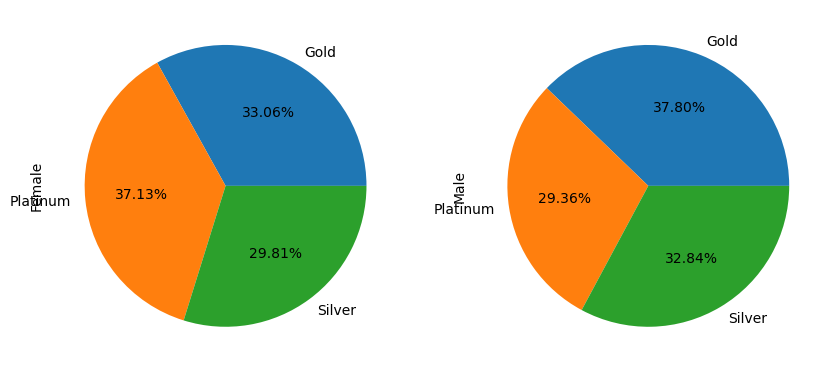

In [1267]:
gen_seg= pd.pivot_table(data = cust_claim , columns='gender' , index='Segment' , values='claim_amount' , aggfunc='sum')
gen_seg.plot(kind='pie', subplots=True ,autopct='%.2f%%' , figsize=(10, 6), legend=False )

array([<Axes: ylabel='Gold'>, <Axes: ylabel='Platinum'>,
       <Axes: ylabel='Silver'>], dtype=object)

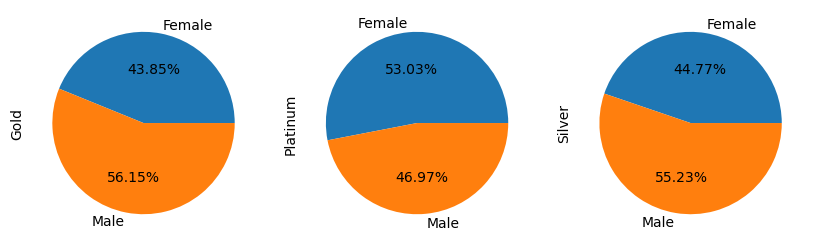

In [1269]:
gen_seg.T.plot(kind='pie', subplots=True ,autopct='%.2f%%' , figsize=(10, 6), legend=False )

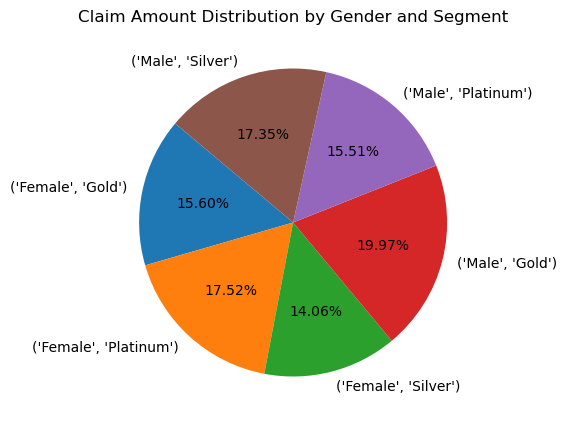

In [1260]:
combined_group = cust_claim.groupby(['gender', 'Segment'])['claim_amount'].sum()
plt.figure(figsize=(5,5))
plt.pie(combined_group, labels=combined_group.index, autopct='%.2f%%', startangle=140)
plt.title("Claim Amount Distribution by Gender and Segment")
plt.show()

### Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [1344]:
gender_count =  pd.DataFrame(cust_claim[cust_claim.incident_cause.str.contains('driver', case= False , na= False)].gender.value_counts())
gender_amount = cust_claim[cust_claim.incident_cause.str.contains('driver', case= False , na= False)].groupby('gender')[['claim_amount']].sum()

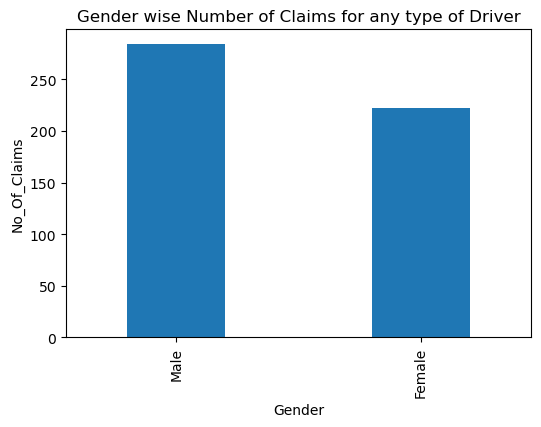

In [1440]:
gender_count.plot(kind='bar',legend= False , figsize=(6,4) , width=0.4 , title= 'Gender wise Number of Claims for any type of Driver')
plt.xlabel('Gender')
plt.ylabel('No_Of_Claims')
plt.show()

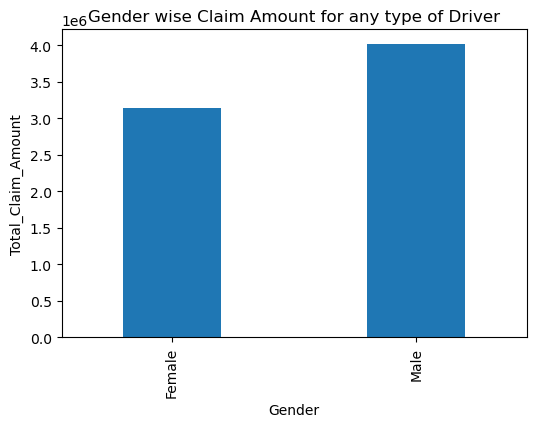

In [1403]:
gender_amount.plot(kind='bar',legend= False , figsize=(6,4) , width=0.4 , title= 'Gender wise Claim Amount for any type of Driver')
plt.xlabel('Gender')
plt.ylabel('Total_Claim_Amount')
plt.show()

### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [1476]:
fraudulent_age= cust_claim[cust_claim.fraudulent.str.contains('yes', case= False)].groupby('age_cat', 
                                                                    observed= False)[['fraudulent']].count().add_prefix('No_of_',axis=1).reset_index()
fraudulent_age

,age_cat,No_of_fraudulent
0,Children,0
1,Younth,25
2,Adult,187
3,Senior,35


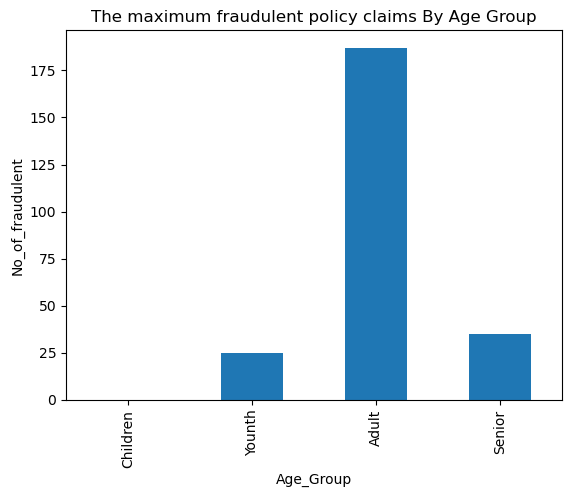

In [1489]:
fraudulent_age.plot(kind='bar' , x='age_cat' , y='No_of_fraudulent', legend= False , title= 'The maximum fraudulent policy claims By Age Group' )
plt.ylabel('No_of_fraudulent')
plt.xlabel('Age_Group')
plt.show()

### Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [1667]:
month= cust_claim.claim_date.dt.month.rename('month')
month_name= cust_claim.claim_date.dt.month_name().rename('month_name')
monthly_trend= cust_claim.groupby([month,month_name])[['claim_amount']].sum().reset_index().drop(columns='month')
monthly_trend

,month_name,claim_amount
0,January,1.331992e+06
1,February,1.169906e+06
2,March,1.320080e+06
3,April,1.293886e+06
4,May,1.114189e+06
5,June,1.278826e+06
6,July,1.379010e+06
7,August,9.111950e+05
8,September,9.828598e+05
9,October,1.447673e+06


In [1727]:
## monthly_trend1= cust_claim.groupby([month,month_name])[['claim_amount']].sum().droplevel(level=0)

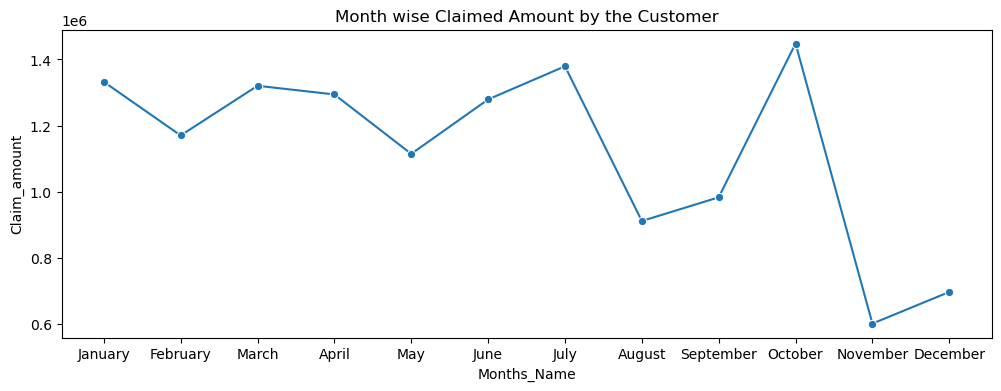

In [1773]:
### By using the seaborn:

plt.figure(figsize=(12,4))
sns.lineplot(data= monthly_trend, x='month_name', y='claim_amount', marker='o' )
plt.title('Month wise Claimed Amount by the Customer')
plt.ylabel('Claim_amount')
plt.xlabel('Months_Name')
plt.show()

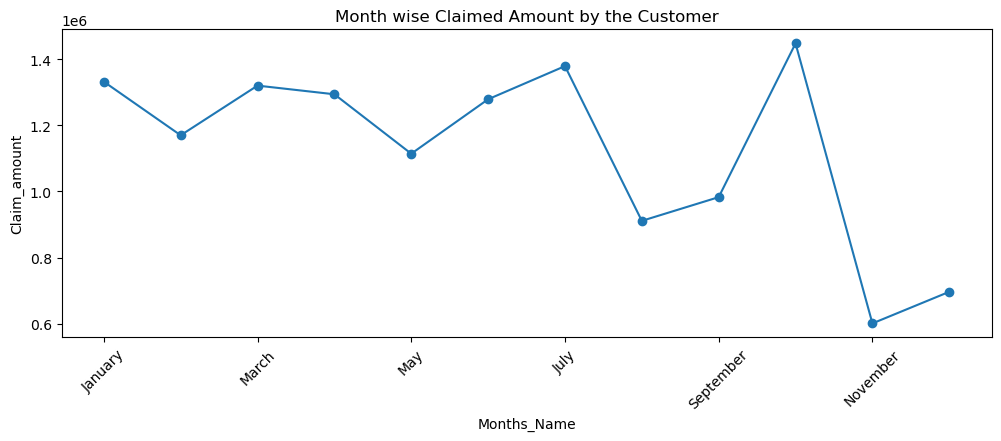

In [1771]:
### By using pandas:

monthly_trend.plot(kind='line',x='month_name', legend= False , title='Month wise Claimed Amount by the Customer' , marker='o', figsize=(12,4),rot=45)
plt.ylabel('Claim_amount')
plt.xlabel('Months_Name')
plt.show()

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [1892]:
average_claim_amount= cust_claim.groupby(['fraudulent','gender','age_cat'],observed= False)[['claim_amount']].mean().reset_index()
average_claim_amount.head()

,fraudulent,gender,age_cat,claim_amount
0,No,Female,Children,NaN
1,No,Female,Younth,11373.131478
2,No,Female,Adult,12671.301964
3,No,Female,Senior,11584.229278
4,No,Male,Children,NaN


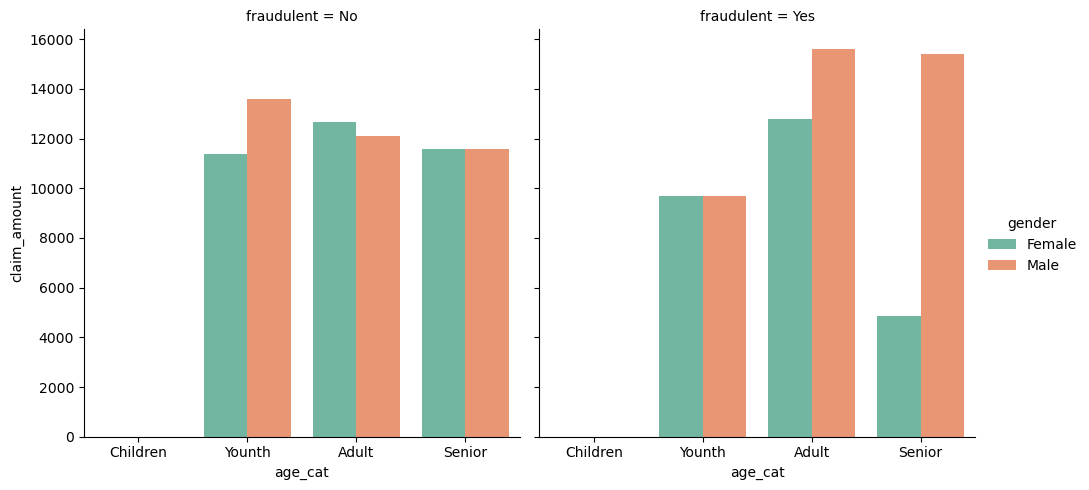

In [1894]:
sns.catplot( data=cust_claim, kind='bar', hue='gender', y='claim_amount', x='age_cat', col='fraudulent', errorbar=None, palette='Set2')

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

### Q16. Is there any similarity in the amount claimed by males and females?

In [1908]:
cust_claim.gender.value_counts()

gender
Male      556
Female    529
Name: count, dtype: int64

In [2008]:
male= cust_claim.loc[cust_claim.gender.str.contains('male' , case= False),'claim_amount']
female= cust_claim.loc[cust_claim.gender.str.contains('female' , case= False),'claim_amount']
print('Mean of male_claim_amount = ' , male.mean())
print('Mean of female_cliam_amount = ' , female.mean())

Mean of male_claim_amount =  12467.681372549021
Mean of female_cliam_amount =  12062.63470662367


**1. NULL Hypothesis , H0 :**
  
                u1 = u2
  
**2. ALTERNATIVE Hypothesis , Ha :**

                u1 <> u2

**3. CI & p-values :**

                CI= 95% & p-value= 0.05

**4. Perform the Test :**

                t-test

In [1934]:
stats.ttest_ind(male,female)

TtestResult(statistic=0.5747549312760801, pvalue=0.5655372527682334, df=1612.0)

**5. Rejection Rule :**

                New p-value > 0.05 
                so, We fail to reject the null hypothesis.

**6. Business Conculsion :**

                Male & Female Claim the same Amount  
                Claim amounts are similar → no gender bias in claim amounts

### Q17. Is there any relationship between age category and segment? 

**1. NULL Hypothesis , H0 :**
  
                Age category & Segment are independent variable.
  
**2. ALTERNATIVE Hypothesis , Ha :**

                Age category & Segment are dependent variable.

**3. CI & p-values :**

                CI= 95% & p-value= 0.05

**4. Perform the Test :**

                chi Squared Test

In [1968]:
obs_freq = pd.crosstab(index=cust_claim.age_cat , columns=cust_claim.Segment)
obs_freq

Segment,Gold,Platinum,Silver
age_cat,,,
Younth,48,44,49
Adult,282,271,259
Senior,45,47,40


In [1970]:
stats.chi2_contingency(obs_freq)

Chi2ContingencyResult(statistic=0.8740846190991387, pvalue=0.9282490030693169, dof=4, expected_freq=array([[ 48.73271889,  47.04331797,  45.22396313],
       [280.64516129, 270.91612903, 260.43870968],
       [ 45.62211982,  44.040553  ,  42.33732719]]))

**5. Rejection Rule :**

                At p value= 0.05 & dof = 4 , chi-score = 9.4
                our chi-score= 0.87

                        new p-value > 0.05 ------> we fail to reject the null hypothesis(H0)

**6. Business Conculsion :**

                Age_cat & Segment are independent variables. 
                Age category does not affect how customers are segmented. 

### Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [2010]:
current_year=cust_claim.loc[cust_claim.claim_date.dt.year == 2018,'claim_amount']
print('Mean of claim_amount of 2018: ', current_year.mean())

Mean of claim_amount of 2018:  12701.148186173854


**1. NULL Hypothesis , H0 :**

                u1 = u2

**2. ALTERNATIVE Hypothesis , Ha :**

                u1 <> u2

**3. CI & p-values :**

                CI = 95% & p value= 0.05

**4. Perform the Test :**

                t-test

In [2014]:
stats.ttest_1samp(current_year,10000)

TtestResult(statistic=4.421788475402985, pvalue=1.2086880225728461e-05, df=486)

**5. Rejection Rule :**

                New p-value < 0.05 
                so, We reject the null hypothesis.

**6. Business Conculsion :**

                The average claim amount is significantly different from $10,000

### Q19. Is there any difference between age groups and insurance claims?

In [2024]:
cust_claim.age_cat.value_counts()

age_cat
Adult       812
Younth      141
Senior      132
Children      0
Name: count, dtype: int64

In [2028]:
m1 = cust_claim.loc[cust_claim.age_cat == 'Adult','claim_amount']
m2 = cust_claim.loc[cust_claim.age_cat == 'Younth','claim_amount']
m3 = cust_claim.loc[cust_claim.age_cat == 'Senior','claim_amount']
print('Mean of amount claim by the Adult age group : ', m1.mean())
print('Mean of amount claim by the Youth age group : ', m2.mean())
print('Mean of amount claim by the Senior age group : ', m3.mean())

Mean of amount claim by the Adult age group :  12810.893503090892
Mean of amount claim by the Youth age group :  12019.395842024755
Mean of amount claim by the Senior age group :  10835.257204396912


**1. NULL Hypothesis , H0 :**

                u1 = u2 = u3

**2. ALTERNATIVE Hypothesis , Ha :**

                u1 <> u2 <> u3

**3. CI & p-values :**

                CI = 95% & p value= 0.05

**4. Perform the Test :**

                f-test  | ANOVA test

In [2032]:
stats.f_oneway(m1,m2,m3)

F_onewayResult(statistic=1.332776829877865, pvalue=0.26417649843631796)

**5. Rejection Rule :**

                New p-value < 0.05 
                so, We fail to reject the null hypothesis.

**6. Business Conculsion :**

                Insurance Claim behavior does not differ by age groups.

### Q20. Is there any relationship between total number of policy claims and the claimed amount?

**1. NULL hypothesis , H0 :**

                Total_policy_claims & Claimed_amount are independent variables.


**2. ALTERNATIVE hypothesis , Ha :**

                Total_policy_claims & Claimed_amount are dependent variables.

**3. CI & p-values :**

                CI= 95% , p-value=0.05

**4. Perform the test :**

                pearsonr()

In [2043]:
stats.pearsonr(cust_claim.total_policy_claims , cust_claim.claim_amount)

PearsonRResult(statistic=-0.01744856239346894, pvalue=0.5658830110321474)

**5. Rejection Rule :**

            New p-value > 0.05 hence , We fail to reject the null hypothesis.

            Cofficient value = -0.01744856239346894 which is a very weak negative correlation, indicating practically no relationship.

**6. Business conclusion :**

            Total_policy_claims & Claimed_amount are independent variables.
            
        (This implies that customers making more claims do not necessarily claim higher amounts, and customers with fewer claims do not                                necessarily claim lower amounts.)